# Gradient Boosted Regression Trees

Gradient Boosted Regression Trees works by building trees in serial manner , where each trees tries to correct the mistake if the previous one.

No randomization ; instead strong pre-pruning is required.

Gradient Boosted trees are very shallow trees , of depth one to five , which makes model smaller in memory and makes prediction faster.

### Applying GradientBoostingClassifier on Breast Cancer Dataset

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
cancer=load_breast_cancer()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [12]:
gbrt=GradientBoostingClassifier(random_state=0) # by default max_depth=3,n_estimators=100,& learning rate = 0.1

In [13]:
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [15]:
print("Accuracy on train set {}" .format(gbrt.score(X_train,y_train)))
print("Accuracy on test set {}" .format(gbrt.score(X_test,y_test)))

Accuracy on train set 1.0
Accuracy on test set 0.958041958041958


Explanation: Here we can see accuracy on training data is 100% so we are likely overfitting . 

### Reduce the overfitting

### Pre Pruning by limiting the maximum depth

In [25]:
grbt=GradientBoostingClassifier(random_state=0,max_depth=1)
grbt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [29]:
print("accuracy on training set {}" .format(grbt.score(X_train,y_train)))
print("accuracy on test set {}" .format(grbt.score(X_test,y_test)))

accuracy on training set 0.9906103286384976
accuracy on test set 0.972027972027972


### Lowering the learning rate

In [32]:
grbt=GradientBoostingClassifier(random_state=0,learning_rate=0.01).fit(X_train,y_train)
print("accuracy on training set {}" .format(grbt.score(X_train,y_train)))
print("accuracy on test set {}" .format(grbt.score(X_test,y_test)))

accuracy on training set 0.9882629107981221
accuracy on test set 0.965034965034965


Explanation for the above :
                             lowering the maximum depth has a significant impact on on the model by reducing the overfitting and a better generalization.
                             
Lowering the leaning rate only increases the generalization performance slightly

## Visualizing the Feature Importances

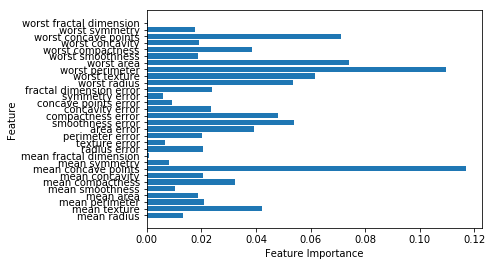

In [38]:
grbt=GradientBoostingClassifier(random_state=0,max_depth=1).fit(X_train,y_train)
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(gbrt)

Explanation:
feature importances of GBRT is somewhat similar to Random Forests but GBRT completely ignores some of the features.

### Random forest Vs Gradient Boosted Regression Trees

As both RF's and GBRT works well on similar kind of data, a common approach is to try RF's first,which work quite robustly .
If time is at a premium , or its important to squeez out last % of accuracy from the machine learning model,moving to GBRT often helps.